In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import pandas as pd
import statsmodels.stats.api as sm

%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [18]:
# loading dataset
def getData(strt_date = "2019-01-01", end_date = "2019-12-31"):
    FF = pd.read_csv("C:\\Users\\murty\\Desktop\\Fulldata.csv")
    # Date format change
    FF["Date"] = pd.to_datetime(FF["Date"])
    # Data selection
    df = FF[(FF["Date"] >= strt_date) & (FF["Date"] <= end_date)]
    # Reset Index
    df = df.reset_index()
    df = df.drop(["index"], axis =1)
    # Average Column and no. of days calculations
    df["Average"] = (FF["Open"] + 2*FF["High"] + FF["Close"])/4
    df["Days"] = range(1,df.shape[0]+1)
    df["delta_Open"] = (df.Open - df.Open.shift(periods=1))
    df["delta_Close"] = (df.Close - df.Close.shift(periods=1))
    df["delta_RMW"] = (df.RMW - df.RMW.shift(periods=1))
    df["delta_SMB"] = (df.SMB - df.SMB.shift(periods=1))
    df["delta_MktRF"] = (df["Mkt-RF"] - df["Mkt-RF"].shift(periods=1))
    df["delta_HML"] = (df.HML - df.HML.shift(periods=1))
    df["delta_CMA"] = (df.CMA - df.CMA.shift(periods=1))
    df["delta_Average"] = (df.Average - df.Average.shift(periods=1))
    df = df.dropna().reset_index(drop=True)
    
    df["label"] = df.delta_Open
    df = df.drop("delta_Open", axis=1)
    
    return df

In [19]:

## One year data
df = getData()

## Removing correlated columns
df.columns
df = df.drop(["High","Low","Adj Close"," HC- Open"," HC- High"," HC- Low"," HC- Close"], axis=1)
df

Date        Open       Close    Volume  Mkt-RF   SMB   HML   RMW  \
0   2019-01-03   90.940002   90.639999   9820200   -2.45  0.52  1.23 -0.25   
1   2019-01-04   90.839996   92.489998  10565700    3.55  0.39 -0.74 -0.09   
2   2019-01-07   91.910004   92.120003   9012500    0.94  0.82 -0.67 -0.70   
3   2019-01-08   92.699997   92.459999   9551300    1.01  0.44 -0.53  0.35   
4   2019-01-09   92.690002   90.949997  15015600    0.56  0.51 -0.04  0.09   
..         ...         ...         ...       ...     ...   ...   ...   ...   
246 2019-12-24  124.790001  125.220001   2022100    0.01  0.36 -0.07 -0.28   
247 2019-12-26  125.099999  125.220001   4760400    0.49 -0.56  0.00  0.23   
248 2019-12-27  125.559998  126.089996   5192000   -0.09 -0.54 -0.07  0.24   
249 2019-12-30  125.760002  124.470001   3884300   -0.57  0.27  0.58  0.15   
250 2019-12-31  124.430000  124.900001   4798900    0.28  0.02  0.14 -0.11   

      CMA     RF    Average  Days  delta_Close  delta_RMW  delta_SMB  \
0    0.91  0.010  53.531250     2    -0.639999      -0.12      -0.21   
1   -0.58  0.010  52.343750     3     1.849998       0.16      -0.13   
2   -0.41  0.010  53.984375     4    -0.369995      -0.61       0.43   
3   -0.09  0.010  57.507812     5     0.339996       1.05      -0.38   
4   -0.18  0.010  58.296875     6    -1.510002      -0.26       0.07   
..    ...    ...        ...   ...          ...        ...        ...   
246  0.02  0.007  37.156250   248     0.320000      -0.16       0.20   
247 -0.19  0.007  37.203125   249     0.000000       0.51      -0.92   
248  0.16  0.007  38.687500   250     0.869995       0.01       0.02   
249  0.45  0.007  38.687500   251    -1.619995      -0.09       0.81   
250  0.22  0.007  39.226562   252     0.430000      -0.26      -0.25   

     delta_MktRF  delta_HML  delta_CMA  delta_Average     label  
0          -2.68       0.08       0.65      -0.328125 -0.089996  
1           6.00      -1.97      -1.49      -1.187500 -0.100006  
2          -2.61       0.07       0.17       1.640625  1.070007  
3           0.07       0.14       0.32       3.523438  0.789993  
4          -0.45       0.49      -0.09       0.789062 -0.009995  
..           ...        ...        ...            ...       ...  
246        -0.09       0.21      -0.29       0.054688 -0.729996  
247         0.48       0.07      -0.21       0.046875  0.309998  
248        -0.58      -0.07       0.35       1.484375  0.459999  
249        -0.48       0.65       0.29       0.000000  0.200004  
250         0.85      -0.44      -0.23       0.539062 -1.330002  

[251 rows x 20 columns]

In [45]:
df_x = df.drop("label", axis =1).shift(periods=1).dropna().reset_index(drop=True)
df_y = df[["label"]].shift(periods=-1).dropna().reset_index(drop=True)
modified_df = pd.concat([df_x,df_y], axis =1)


modified_df
modified_df = modified_df.drop(["Date"], axis =1)

In [48]:
train_start_date = "2019-01-01"
train_end_date =  "2019-10-31"
test_start_date = "2019-11-01"
test_end_date = "2019-12-31"
df_train = df[(df["Date"] >= train_start_date) & (df["Date"] <= train_end_date)]
df_test = df[(df["Date"] >= test_start_date) & (df["Date"] <= test_end_date)]
df_train = df_train.drop(["Date","Days","Close","Mkt-RF","SMB","HML","RMW","CMA","Average"], axis=1)
df_test = df_test.drop(["Date","Days","Close","Mkt-RF","SMB","HML","RMW","CMA","Average"], axis=1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_test, test_size=0.2, random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [210, 41]

In [54]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(df_train, df_test)


ValueError: Number of labels=41 does not match number of samples=210

In [23]:
df_test.head()

Open    Volume     RF  delta_Close  delta_RMW  delta_SMB  \
210  124.830002   6010100  0.006    -0.639999      -0.01       0.93   
211  123.919998  10351400  0.006    -4.800003       0.83      -0.26   
212  118.830002   9239600  0.006    -0.169998      -0.62       0.06   
213  119.099999   6755900  0.006     1.419998      -0.16      -1.19   
214  120.339996   8909700  0.006    -0.699997       0.36       0.81   

     delta_MktRF  delta_HML  delta_CMA  delta_Average     label  
210         1.46       1.26      -0.04      -1.867188  0.040001  
211        -0.68       0.61       0.00      -0.789062 -0.910004  
212        -0.43      -0.98      -0.12      -0.257812 -5.089996  
213        -0.02      -0.33       0.29       0.171875  0.269997  
214         0.43       0.41      -0.40       0.085938  1.239998

In [36]:
rf = RandomForestRegressor(n_estimators=2,max_features=3,max_depth=3, random_state = 0)


In [35]:
rf.fit(df_train, df_test)

ValueError: Number of labels=41 does not match number of samples=210

In [11]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [12]:
sqrt(mean_squared_error(rf.predict(X_train), y_train))

0.14549273750235017

In [13]:
sqrt(mean_squared_error(rf.predict(X_test), y_test))

0.4432278667207685

Text(0, 0.5, 'Estimated Open')

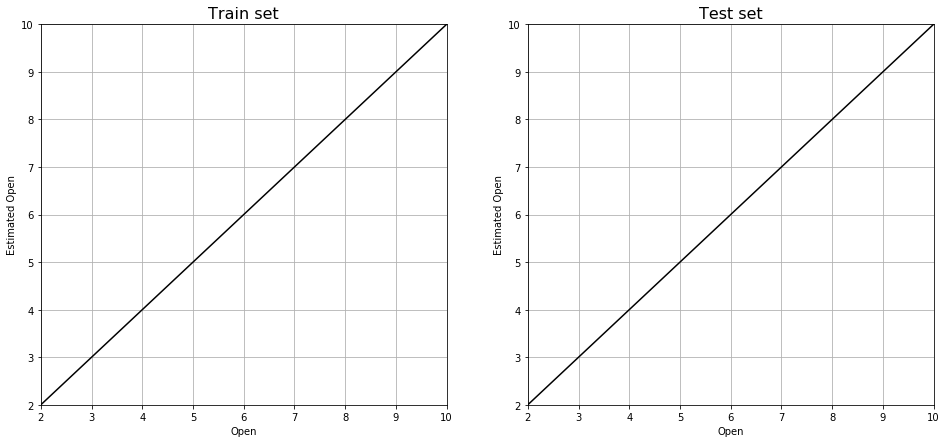

In [14]:
plt.figure(figsize(16,7))
plt.subplot(121)
pyplot.scatter(y_train, rf.predict(X_train), color="red", alpha=0.1)
pyplot.xlim(2,10)
pyplot.ylim(2,10)
plot(range(11), color='black')
grid()
pyplot.title('Train set', fontsize=16)
pyplot.xlabel('Open')
pyplot.ylabel('Estimated Open')

plt.subplot(122)
pyplot.scatter(y_test, rf.predict(X_test), color="red", alpha=0.1)
pyplot.xlim(2,10)
pyplot.ylim(2,10)
plot(range(11), color='black')
grid()
pyplot.title('Test set', fontsize=16)
pyplot.xlabel('Open')
pyplot.ylabel('Estimated Open')